* Importing Libraries
* Read the Data
* Label encoding
* Imputing missing values
* Make sure all values are Finite
* Scaling
* Model to evaluate
* Hyper parameter tuning
* Evaluate Final Model on test set

# Importing Libraries

In [76]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

import sidetable as stb

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
#pd.set_option("display.max_columns",60)
pd.set_option('display.max_columns', None)

# Matplotlib for Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for Visualization
import seaborn as sns


# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Read the Data

In [174]:
df=pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [175]:
df.shape

(11746, 60)

In [40]:
train_features =pd.read_csv("training_features.csv")
test_features = pd.read_csv("testing_features.csv")
train_labels = pd.read_csv("training_labels.csv")
test_labels = pd.read_csv("testing_labels.csv")

print("train_features size:",train_features.shape)
print("test_features size:",test_features.shape)
print("train_labels size:",train_labels.shape)
print("test_labels size:",test_labels.shape)

train_features size: (6622, 66)
test_features size: (2839, 66)
train_labels size: (6622, 1)
test_labels size: (2839, 1)


In [41]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,logDirect GHG Emissions (Metric Tons CO2e),logWater Use (All Water Sources) (kgal),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,8301366.5,91955.4,99.41,NaN,NaN,NaN,NaN,6.088818,8.946987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,4102602.6,44717.4,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,2843828.1,28438.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,12659539.1,136397.4,NaN,40.622968,-74.078742,1.0,

In [42]:
train_features.columns

Index(['Order', 'Property Id', 'DOF Gross Floor Area', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Water Intensity (All Water Sources) (gal/ft²)', 'Latitude',
       'Longitude', 'Community Board', 'Census Tract',
       'logDirect GHG Emissions (Metric Tons CO2e)',
       'logWater Use (All Water Sources) (kgal)', 'Borough_Staten Island',
       'Largest Property Use Type_Adult Education',
       'Largest Property Use Type_Automobile Dealership',
       'Largest Property Use Type_Bank Branch',
       'Largest Property Use Type_College/University',
       'Largest Property Use Type_Convenience Store without Gas Station',
       'Largest Property Use Type_Courthouse',
       'Largest Property Use T

In [43]:
train_labels.head(12)

,ENERGY STAR Score
0,16.0
1,53.0
2,99.0
3,35.0
4,91.0
5,94.0
6,92.0
7,50.0
8,78.0
9,48.0


In [44]:
train_labels.columns

Index(['ENERGY STAR Score'], dtype='object')

# Label encoding

In [45]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,logDirect GHG Emissions (Metric Tons CO2e),logWater Use (All Water Sources) (kgal),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,8301366.5,91955.4,99.41,NaN,NaN,NaN,NaN,6.088818,8.946987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,4102602.6,44717.4,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,2843828.1,28438.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,12659539.1,136397.4,NaN,40.622968,-74.078742,1.0,

In [46]:
#df.column1 = df.column1.replace({True: 1, False: 0})

In [47]:
train_features["Largest Property Use Type_Distribution Center"].unique()

array([False,  True])

In [48]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 66 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Order                                                                       6622 non-null   int64  
 1   Property Id                                                                 6622 non-null   int64  
 2   DOF Gross Floor Area                                                        6590 non-null   float64
 3   Year Built                                                                  6622 non-null   int64  
 4   Number of Buildings - Self-reported                                         6622 non-null   int64  
 5   Occupancy                                                                   6622 non-null   int64  
 6   Site EUI (kBtu/ft²)                             

# Label Encoding 

In [49]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 66 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Order                                                                       6622 non-null   int64  
 1   Property Id                                                                 6622 non-null   int64  
 2   DOF Gross Floor Area                                                        6590 non-null   float64
 3   Year Built                                                                  6622 non-null   int64  
 4   Number of Buildings - Self-reported                                         6622 non-null   int64  
 5   Occupancy                                                                   6622 non-null   int64  
 6   Site EUI (kBtu/ft²)                             

In [50]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across team, position, and all_star columns
#train_features[train_features.iloc[0:,18:36]] = train_features[train_features.iloc[0:,18:36]].apply(LabelEncoder().fit_transform)


#perform label encoding across team, position, and all_star columns
#train_features[['a', 'b']] = train_features[["a", 'b']].apply(LabelEncoder().fit_transform)

train_features[['Borough_Staten Island', 'Largest Property Use Type_Adult Education',"Largest Property Use Type_Automobile Dealership",
                "Largest Property Use Type_Bank Branch","Largest Property Use Type_College/University","Largest Property Use Type_Convenience Store without Gas Station",
               "Largest Property Use Type_Courthouse","Largest Property Use Type_Distribution Center","Largest Property Use Type_Enclosed Mall",
               "Largest Property Use Type_Financial Office","Largest Property Use Type_Hospital (General Medical & Surgical)",
               "Largest Property Use Type_Hotel","Largest Property Use Type_K-12 School","Largest Property Use Type_Library",
               "Largest Property Use Type_Mailing Center/Post Office","Largest Property Use Type_Manufacturing/Industrial Plant",
               "Largest Property Use Type_Medical Office","Largest Property Use Type_Movie Theater"]] = train_features[['Borough_Staten Island', 'Largest Property Use Type_Adult Education',"Largest Property Use Type_Automobile Dealership",
                "Largest Property Use Type_Bank Branch","Largest Property Use Type_College/University","Largest Property Use Type_Convenience Store without Gas Station",
               "Largest Property Use Type_Courthouse","Largest Property Use Type_Distribution Center","Largest Property Use Type_Enclosed Mall",
               "Largest Property Use Type_Financial Office","Largest Property Use Type_Hospital (General Medical & Surgical)",
               "Largest Property Use Type_Hotel","Largest Property Use Type_K-12 School","Largest Property Use Type_Library",
               "Largest Property Use Type_Mailing Center/Post Office","Largest Property Use Type_Manufacturing/Industrial Plant",
               "Largest Property Use Type_Medical Office","Largest Property Use Type_Movie Theater"]].apply(LabelEncoder().fit_transform)


In [51]:
a=train_features.iloc[0,18:36]

In [52]:
b=train_features.iloc[0,36:66]

In [53]:
train_features["Largest Property Use Type_Multifamily Housing"].unique()

array([ True, False])

In [54]:
train_features["Largest Property Use Type_Multifamily Housing"].value_counts()

Largest Property Use Type_Multifamily Housing
True     5212
False    1410
Name: count, dtype: int64

In [55]:
a.dtype

dtype('O')

In [56]:
a

Borough_Staten Island                                              0
Largest Property Use Type_Adult Education                          0
Largest Property Use Type_Automobile Dealership                    0
Largest Property Use Type_Bank Branch                              0
Largest Property Use Type_College/University                       0
Largest Property Use Type_Convenience Store without Gas Station    0
Largest Property Use Type_Courthouse                               0
Largest Property Use Type_Distribution Center                      0
Largest Property Use Type_Enclosed Mall                            0
Largest Property Use Type_Financial Office                         0
Largest Property Use Type_Hospital (General Medical & Surgical)    0
Largest Property Use Type_Hotel                                    0
Largest Property Use Type_K-12 School                              0
Largest Property Use Type_Library                                  0
Largest Property Use Type_Mailing 

In [57]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 66 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Order                                                                       6622 non-null   int64  
 1   Property Id                                                                 6622 non-null   int64  
 2   DOF Gross Floor Area                                                        6590 non-null   float64
 3   Year Built                                                                  6622 non-null   int64  
 4   Number of Buildings - Self-reported                                         6622 non-null   int64  
 5   Occupancy                                                                   6622 non-null   int64  
 6   Site EUI (kBtu/ft²)                             

In [58]:
b

Largest Property Use Type_Multifamily Housing                                  True
Largest Property Use Type_Museum                                              False
Largest Property Use Type_Non-Refrigerated Warehouse                          False
Largest Property Use Type_Other                                               False
Largest Property Use Type_Other - Education                                   False
Largest Property Use Type_Other - Entertainment/Public Assembly               False
Largest Property Use Type_Other - Lodging/Residential                         False
Largest Property Use Type_Other - Mall                                        False
Largest Property Use Type_Other - Public Services                             False
Largest Property Use Type_Other - Recreation                                  False
Largest Property Use Type_Other - Services                                    False
Largest Property Use Type_Other - Specialty Hospital                        

In [59]:
train_features[["Largest Property Use Type_Multifamily Housing","Largest Property Use Type_Museum","Largest Property Use Type_Non-Refrigerated Warehouse",
               "Largest Property Use Type_Other","Largest Property Use Type_Other - Education","Largest Property Use Type_Other - Entertainment/Public Assembly",
               "Largest Property Use Type_Other - Lodging/Residential","Largest Property Use Type_Other - Mall","Largest Property Use Type_Other - Public Services",
               "Largest Property Use Type_Other - Recreation","Largest Property Use Type_Other - Services","Largest Property Use Type_Other - Specialty Hospital",
               "Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy","Largest Property Use Type_Parking","Largest Property Use Type_Performing Arts",
               "Largest Property Use Type_Pre-school/Daycare","Largest Property Use Type_Refrigerated Warehouse","Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",
               "Largest Property Use Type_Residence Hall/Dormitory","Largest Property Use Type_Residential Care Facility","Largest Property Use Type_Restaurant",
               "Largest Property Use Type_Retail Store","Largest Property Use Type_Self-Storage Facility","Largest Property Use Type_Senior Care Community",
               "Largest Property Use Type_Social/Meeting Hall","Largest Property Use Type_Strip Mall","Largest Property Use Type_Supermarket/Grocery Store",
               "Largest Property Use Type_Urgent Care/Clinic/Other Outpatient","Largest Property Use Type_Wholesale Club/Supercenter","Largest Property Use Type_Worship Facility"]]= train_features[["Largest Property Use Type_Multifamily Housing","Largest Property Use Type_Museum","Largest Property Use Type_Non-Refrigerated Warehouse",
               "Largest Property Use Type_Other","Largest Property Use Type_Other - Education","Largest Property Use Type_Other - Entertainment/Public Assembly",
               "Largest Property Use Type_Other - Lodging/Residential","Largest Property Use Type_Other - Mall","Largest Property Use Type_Other - Public Services",
               "Largest Property Use Type_Other - Recreation","Largest Property Use Type_Other - Services","Largest Property Use Type_Other - Specialty Hospital",
               "Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy","Largest Property Use Type_Parking","Largest Property Use Type_Performing Arts",
               "Largest Property Use Type_Pre-school/Daycare","Largest Property Use Type_Refrigerated Warehouse","Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",
               "Largest Property Use Type_Residence Hall/Dormitory","Largest Property Use Type_Residential Care Facility","Largest Property Use Type_Restaurant",
               "Largest Property Use Type_Retail Store","Largest Property Use Type_Self-Storage Facility","Largest Property Use Type_Senior Care Community",
               "Largest Property Use Type_Social/Meeting Hall","Largest Property Use Type_Strip Mall","Largest Property Use Type_Supermarket/Grocery Store",
               "Largest Property Use Type_Urgent Care/Clinic/Other Outpatient","Largest Property Use Type_Wholesale Club/Supercenter","Largest Property Use Type_Worship Facility"]].apply(LabelEncoder().fit_transform)

In [60]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 66 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Order                                                                       6622 non-null   int64  
 1   Property Id                                                                 6622 non-null   int64  
 2   DOF Gross Floor Area                                                        6590 non-null   float64
 3   Year Built                                                                  6622 non-null   int64  
 4   Number of Buildings - Self-reported                                         6622 non-null   int64  
 5   Occupancy                                                                   6622 non-null   int64  
 6   Site EUI (kBtu/ft²)                             

In [61]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,logDirect GHG Emissions (Metric Tons CO2e),logWater Use (All Water Sources) (kgal),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,8301366.5,91955.4,99.41,NaN,NaN,NaN,NaN,6.088818,8.946987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,4102602.6,44717.4,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,2843828.1,28438.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,12659539.1,136397.4,NaN,40.622968,-74.078742,1.0,27.0,6.510853,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,62.3,3.5,0.0,185387.9,1876.6,28.65,40.782421,-73.972622,7.0,165.0,6.123589,8.158774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
train_features.shape

(6622, 66)

# Imputing missing values 

In [234]:
# Create an imputer object with a median filling startegy
imputer = SimpleImputer(strategy="median")

#Train on the training features
imputer.fit(train_features)

#tranform both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)



In [235]:
print(np.sum(np.isnan(X)))
print(np.sum(np.isnan(X_test)))

0
0


### Make sure all values are Finite

In [236]:
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Scaling

In [250]:
# create a scaler object with a range of 0 -1
scaler = MinMaxScaler(feature_range=(0,1))

#fit on the training data
scaler.fit(X)

#tranform both training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [251]:
#convert y to 1D array
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [252]:
y_test.ndim

1

In [253]:
y.ndim

1

In [254]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,logDirect GHG Emissions (Metric Tons CO2e),logWater Use (All Water Sources) (kgal),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,8301366.5,91955.4,99.41,NaN,NaN,NaN,NaN,6.088818,8.946987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,4102602.6,44717.4,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,2843828.1,28438.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,12659539.1,136397.4,NaN,40.622968,-74.078742,1.0,27.0,6.510853,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,62.3,3.5,0.0,185387.9,1876.6,28.65,40.782421,-73.972622,7.0,165.0,6.123589,8.158774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Models to Evaluate

In [244]:
# Function to calculate mean absolute error
def mae(y_true,y_pred):
    return np.mean(abs(y_true-y_pred))

#Takes in a model , train the model , evaluate the model on the test set
def fit_and_evaluate(model):
    model.fit(X,y)

    # makepredictions and evaluate
    model_pred=model.predict(X_test)
    model_mae = mae(y_test,model_pred)

    # return the performance metric 
    return model_mae

#### Linear Regression

In [259]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print("Linear Regression Performance on test set: MAE = %0.4F" % lr_mae)

Linear Regression Performance on test set: MAE = 13.4605


#### Support Vector Machine Regression

In [260]:
svm = SVR(C=1000 ,gamma=0.1)
svm_mae = fit_and_evaluate(svm)
print("Support Vector Machine Regression Performance on test set: MAE = %0.4F" % svm_mae)

Support Vector Machine Regression Performance on test set: MAE = 10.9349


#### Random Forest Regresssion

In [261]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)
print("Random Forest Regresssion Performance on test set: MAE = %0.4F" % random_forest_mae)

Random Forest Regresssion Performance on test set: MAE = 9.5501


#### Gradient Boosting Regression

In [262]:
gradient_boosted =GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
print("Gradient Boosting Regression Performance on test set: MAE = %0.4F" %gradient_boosted_mae)

Gradient Boosting Regression Performance on test set: MAE = 9.9929


#### K-Nearest Neighbour Regression

In [263]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)
print("K-Nearest Neighbour Regression Performance on test set: MAE = %0.4F" %knn_mae)

K-Nearest Neighbour Regression Performance on test set: MAE = 13.0990


Text(0.5, 1.0, 'Model comparison on Test MAE')

<Figure size 500x500 with 0 Axes>

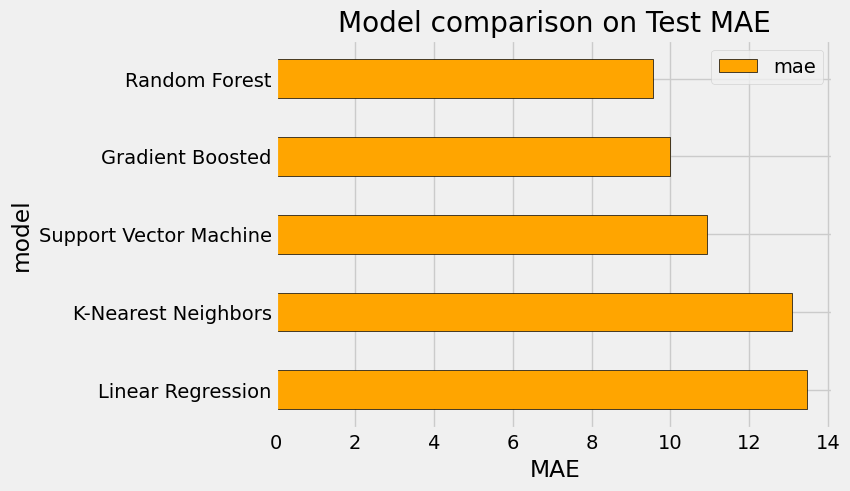

In [267]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5,5))

# Dataframe to hold results
model_comparison = pd.DataFrame({"model":["Linear Regression","Support Vector Machine","Random Forest",
                                          "Gradient Boosted","K-Nearest Neighbors"],
                                 "mae":[lr_mae,svm_mae,random_forest_mae,gradient_boosted_mae,knn_mae]
                                })

# Horizontal bar chart of test mae
model_comparison.sort_values("mae",ascending=False).plot(x="model",y="mae",kind="barh",color="orange",edgecolor="black")

plt.xlabel("MAE")
plt.title("Model comparison on Test MAE")

### Hyper parameter tuning

In [268]:
# Loss function to be optimized
loss = ["ls","lad","huber"]

# Number of trees used in the boosting process
n_estimators = [100,500,900,1100,1500]

# Maximun depth of each tree
max_depth = [2,3,5,10,15]

# Minnimum number of samples per leaf
min_samples_leaf = [1,2,4,6,8]

# Minimun number of samples to split a node
min_samples_split = [2,4,6,10]

# Maximum number of features to consider for making splits
max_features = ["auto","sqrt","log2",None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {"loss":loss,
                       "n_estimators":n_estimators,
                       "max_depth":max_depth,
                       "min_samples_leaf":min_samples_leaf,
                       "max_features":max_features}

In [270]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)

# Set up the random search with 4-fold cross validation (cv)
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv = 4,
                               n_iter=25,
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1,
                               return_train_score=True,
                               random_state=42)                 

In [271]:
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [275]:
# get all the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score",ascending=False)
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,34.724033,1.046173,0.018656,0.002690,500,6,auto,3,huber,"{'n_estimators': 500, 'min_samples_leaf': 6, '...",-9.087719,-9.003952,-9.534490,-9.300323,-9.231621,0.205542,1,-6.934653,-7.229646,-6.878654,-6.871684,-6.978659,0.146949
20,124.712282,2.609520,0.068878,0.011961,1500,8,None,3,huber,"{'n_estimators': 1500, 'min_samples_leaf': 8, ...",-9.105534,-9.048385,-9.449870,-9.456279,-9.265017,0.189153,2,-4.924663,-4.768211,-6.024948,-4.725198,-5.110755,0.533003
13,286.582226,2.548686,0.167841,0.017876,900,2,None,10,huber,"{'n_estimators': 900, 'min_samples_leaf': 2, '...",-9.419689,-9.333523,-9.651520,-9.322248,-9.431745,0.132366,3,-0.065326,-0.066163,-0.075998,-0.071101,-0.069647,0.004280
21,22.457327,1.285053,0.054245,0.006746,1100,1,sqrt,3,huber,"{'n_estimators': 1100, 'min_samples_leaf': 1, ...",-9.396630,-9.241652,-9.735611,-9.422014,-9.448977,0.179311,4,-6.407508,-6.339167,-6.282319,-6.341401,-6.342599,0.044329
15,41.121097,2.612216,0.103892,0.016886,1100,6,log2,5,huber,"{'n_estimators': 1100, 'min_samples_leaf': 6, ...",-9.347409,-9.222330,-9.639026,-9.644965,-9.463433,0.183969,5,-3.842809,-3.910320,-3.826906,-3.828823,-3.852214,0.034104
8,22.561860,1.075282,0.048438,0.001717,900,8,log2,5,huber,"{'n_estimators': 900, 'min_samples_leaf': 8, '...",-9.284539,-9.433608,-9.697469,-9.504519,-9.480034,0.148536,6,-4.624676,-4.576842,-4.512077,-4.369970,-4.520891,0.095860
16,211.557943,3.979538,0.112724,0.005401,500,6,None,15,huber,"{'n_estimators': 500, 'min_samples_leaf': 6, '...",-9.299935,-9.247486,-9.893171,-9.633057,-9.518412,0.262069,7,-0.318704,-0.390933,-0.325865,-0.331218,-0.341680,0.028781
24,1024.092728,7.091542,0.247660,0.040397,1500,6,auto,15,huber,"{'n_estimators': 1500, 'min_samples_leaf': 6, ...",-9.303534,-9.259048,-9.901758,-9.629192,-9.523383,0.261041,8,-0.227357,-0.264481,-0.238349,-0.231684,-0.240468,0.014406
23,52.181599,1.722215,0.113245,0.003662,1500,8,sqrt,5,huber,"{'n_estimators': 1500, 'min_samples_leaf': 8, ...",-9.344328,-9.461288,-9.631379,-9.698757,-9.533938,0.139544,9,-2.907511,-2.840399,-2.923309,-2.718815,-2.847508,0.080558
22,8.521353,0.451958,0.009407,0.003613,100,6,None,3,huber,"{'n_estimators': 100, 'min_samples_leaf': 6, '...",-9.525179,-9.423432,-9.859050,-9.745288,-9.638237,0.172584,10,-8.963317,-8.998326,-8.819097,-8.967694,-8.937109,0.069456


In [276]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_features='auto', min_samples_leaf=6,
                          n_estimators=500, random_state=42)

In [277]:
# Create a range of trees to evaluate
trees_grid = {"n_estimators":[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]}

model = GradientBoostingRegressor(loss='huber', max_features='auto', min_samples_leaf=6,
                          n_estimators=500, random_state=42)
    
# grid search object using the tree range and random forest model
grid_search = GridSearchCV(estimator=model,param_grid=trees_grid,cv=4,
                           scoring="neg_mean_absolute_error",
                            n_jobs=-1, verbose=1,
                            return_train_score=True)

In [278]:
grid_search.fit(X,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='huber',
                                                 max_features='auto',
                                                 min_samples_leaf=6,
                                                 n_estimators=500,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Text(0.5, 1.0, 'Performance Vs number of trees')

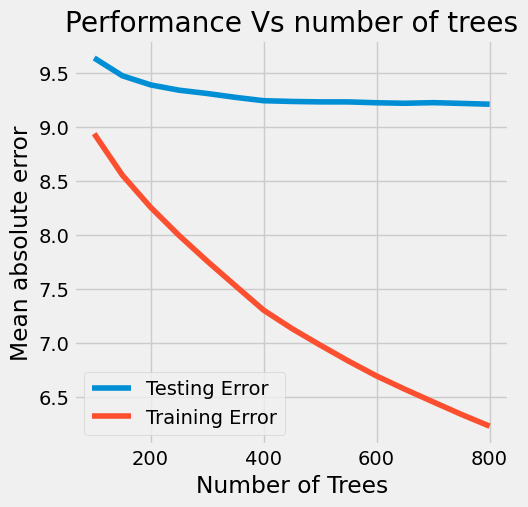

In [281]:
# Get results into dataframe
results = pd.DataFrame(grid_search.cv_results_)

#Plot training and testing errors vs number of trees
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5,5))
plt.plot(results["param_n_estimators"],-1 * results["mean_test_score"],label = "Testing Error")
plt.plot(results["param_n_estimators"],-1 * results["mean_train_score"],label = "Training Error")
plt.xlabel("Number of Trees");
plt.ylabel("Mean absolute error");plt.legend();
plt.title("Performance Vs number of trees")

In [282]:
results.sort_values("mean_test_score",ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,57.767223,0.675846,0.022765,0.004731,800,{'n_estimators': 800},-9.045660,-8.948126,-9.519505,-9.327498,-9.210197,0.226487,1,-6.104360,-6.822114,-6.022889,-5.960879,-6.227561,0.347016
13,63.720956,0.862068,0.029249,0.002285,750,{'n_estimators': 750},-9.056774,-8.957931,-9.525344,-9.330061,-9.217527,0.223968,2,-6.222683,-6.884460,-6.137019,-6.101933,-6.336524,0.319386
11,54.821991,1.228886,0.032068,0.005237,650,{'n_estimators': 650},-9.079478,-8.956476,-9.529260,-9.309950,-9.218791,0.219612,3,-6.472114,-7.013255,-6.417463,-6.375586,-6.569605,0.258418
10,52.305526,0.463448,0.025254,0.002587,600,{'n_estimators': 600},-9.076905,-8.966551,-9.526113,-9.324314,-9.223471,0.217515,4,-6.608367,-7.069361,-6.557229,-6.533345,-6.692076,0.219505
12,56.986462,0.558781,0.036713,0.009137,700,{'n_estimators': 700},-9.076241,-8.957579,-9.544195,-9.320037,-9.224513,0.226141,5,-6.330465,-6.950502,-6.292827,-6.235791,-6.452396,0.289550


# Evaluate Final Model on test set

In [283]:
# Default model
default_model = GradientBoostingRegressor(random_state=42)

# Select best model
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='huber', max_features='auto', min_samples_leaf=6,
                          n_estimators=800, random_state=42)

In [284]:
default_model.fit(X,y)

GradientBoostingRegressor(random_state=42)

In [285]:
final_model.fit(X,y)

GradientBoostingRegressor(loss='huber', max_features='auto', min_samples_leaf=6,
                          n_estimators=800, random_state=42)

In [286]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print("Default model performance on the test set: MAE = %0.4f" % mae(y_test,default_pred))
print("Final model performance on the test set: MAE = %0.4f" % mae(y_test,final_pred))

Default model performance on the test set: MAE = 9.9932
Final model performance on the test set: MAE = 9.3094


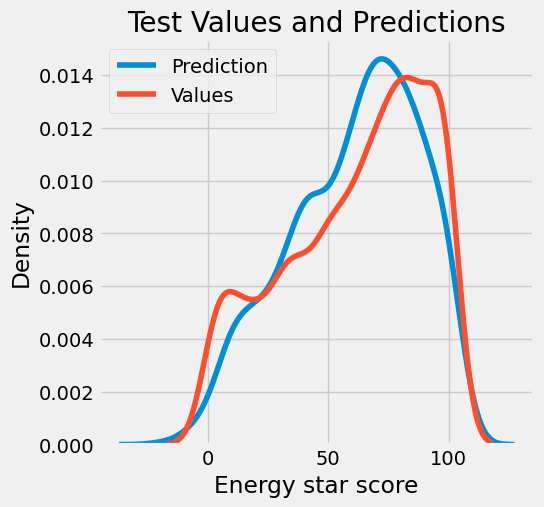

In [288]:
plt.figure(figsize=(5,5))
sns.kdeplot(final_pred,label="Prediction")
sns.kdeplot(y_test,label="Values")
plt.xlabel("Energy star score");
plt.ylabel("Density");plt.legend();
plt.title("Test Values and Predictions");

Text(0.5, 1.0, 'Distribution of Residuals')

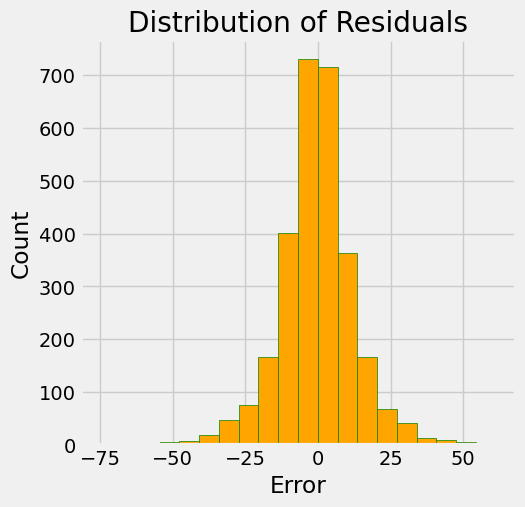

In [291]:
plt.figure(figsize=(5,5))

# calculate the residuals
residuals = final_pred - y_test
plt.hist(residuals,color="orange",bins=20,edgecolor="green")
plt.xlabel("Error");
plt.ylabel("Count");
plt.title("Distribution of Residuals")

#### Thank You...